In [1]:
# Install the Earth Engine library
!pip install earthengine-api

# Install other libraries such as geemap (optional for visualizations)
!pip install geemap


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


##Bisha data anaysis

**Bisha image from space to identify promising agricultural areas**

In [2]:
import ee

# Authenticate Earth Engine
ee.Authenticate()

# Initialize with the Google Cloud project ID
ee.Initialize(project='ee-layanalshahrani29')


In [3]:
ee.Authenticate(scopes=["https://www.googleapis.com/auth/earthengine",
                        "https://www.googleapis.com/auth/cloud-platform",
                        "https://www.googleapis.com/auth/drive"])
ee.Initialize()


In [ ]:
import ee
import folium

# Function to add Earth Engine layers to folium map
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add the custom method to folium's Map object
folium.Map.add_ee_layer = add_ee_layer

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Define the Bisha region
bishah = ee.Geometry.Rectangle([42.3, 19.75, 43.15, 20.4])

# Load Sentinel-2 image collection
sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
              .filterBounds(bishah) \
              .filterDate('2023-01-01', '2023-12-31') \
              .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))

# Create a median composite image
sentinel_median = sentinel2.median()

# Set visualization parameters
vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # Red, Green, Blue bands
    'min': 0,
    'max': 3000,
}

# Create a folium map centered on Bisha
map_bishah = folium.Map(location=[20.1, 42.7], zoom_start=8)

# Add the Sentinel-2 image to the map
map_bishah.add_ee_layer(sentinel_median, vis_params, 'Sentinel-2')

# Add Layer Control to toggle layers
map_bishah.add_child(folium.LayerControl())

# Display the map
map_bishah


/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


In [5]:
# Function to add Earth Engine layer to folium
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add this functionality to folium
folium.Map.add_ee_layer = add_ee_layer


In [ ]:
# Export the median NDVI to Google Drive
ndvi = sentinel2.median().normalizedDifference(['B8', 'B4']).rename('NDVI')
export_task = ee.batch.Export.image.toDrive(ndvi, description='bishah_ndvi', scale=30, region=bishah)
export_task.start()

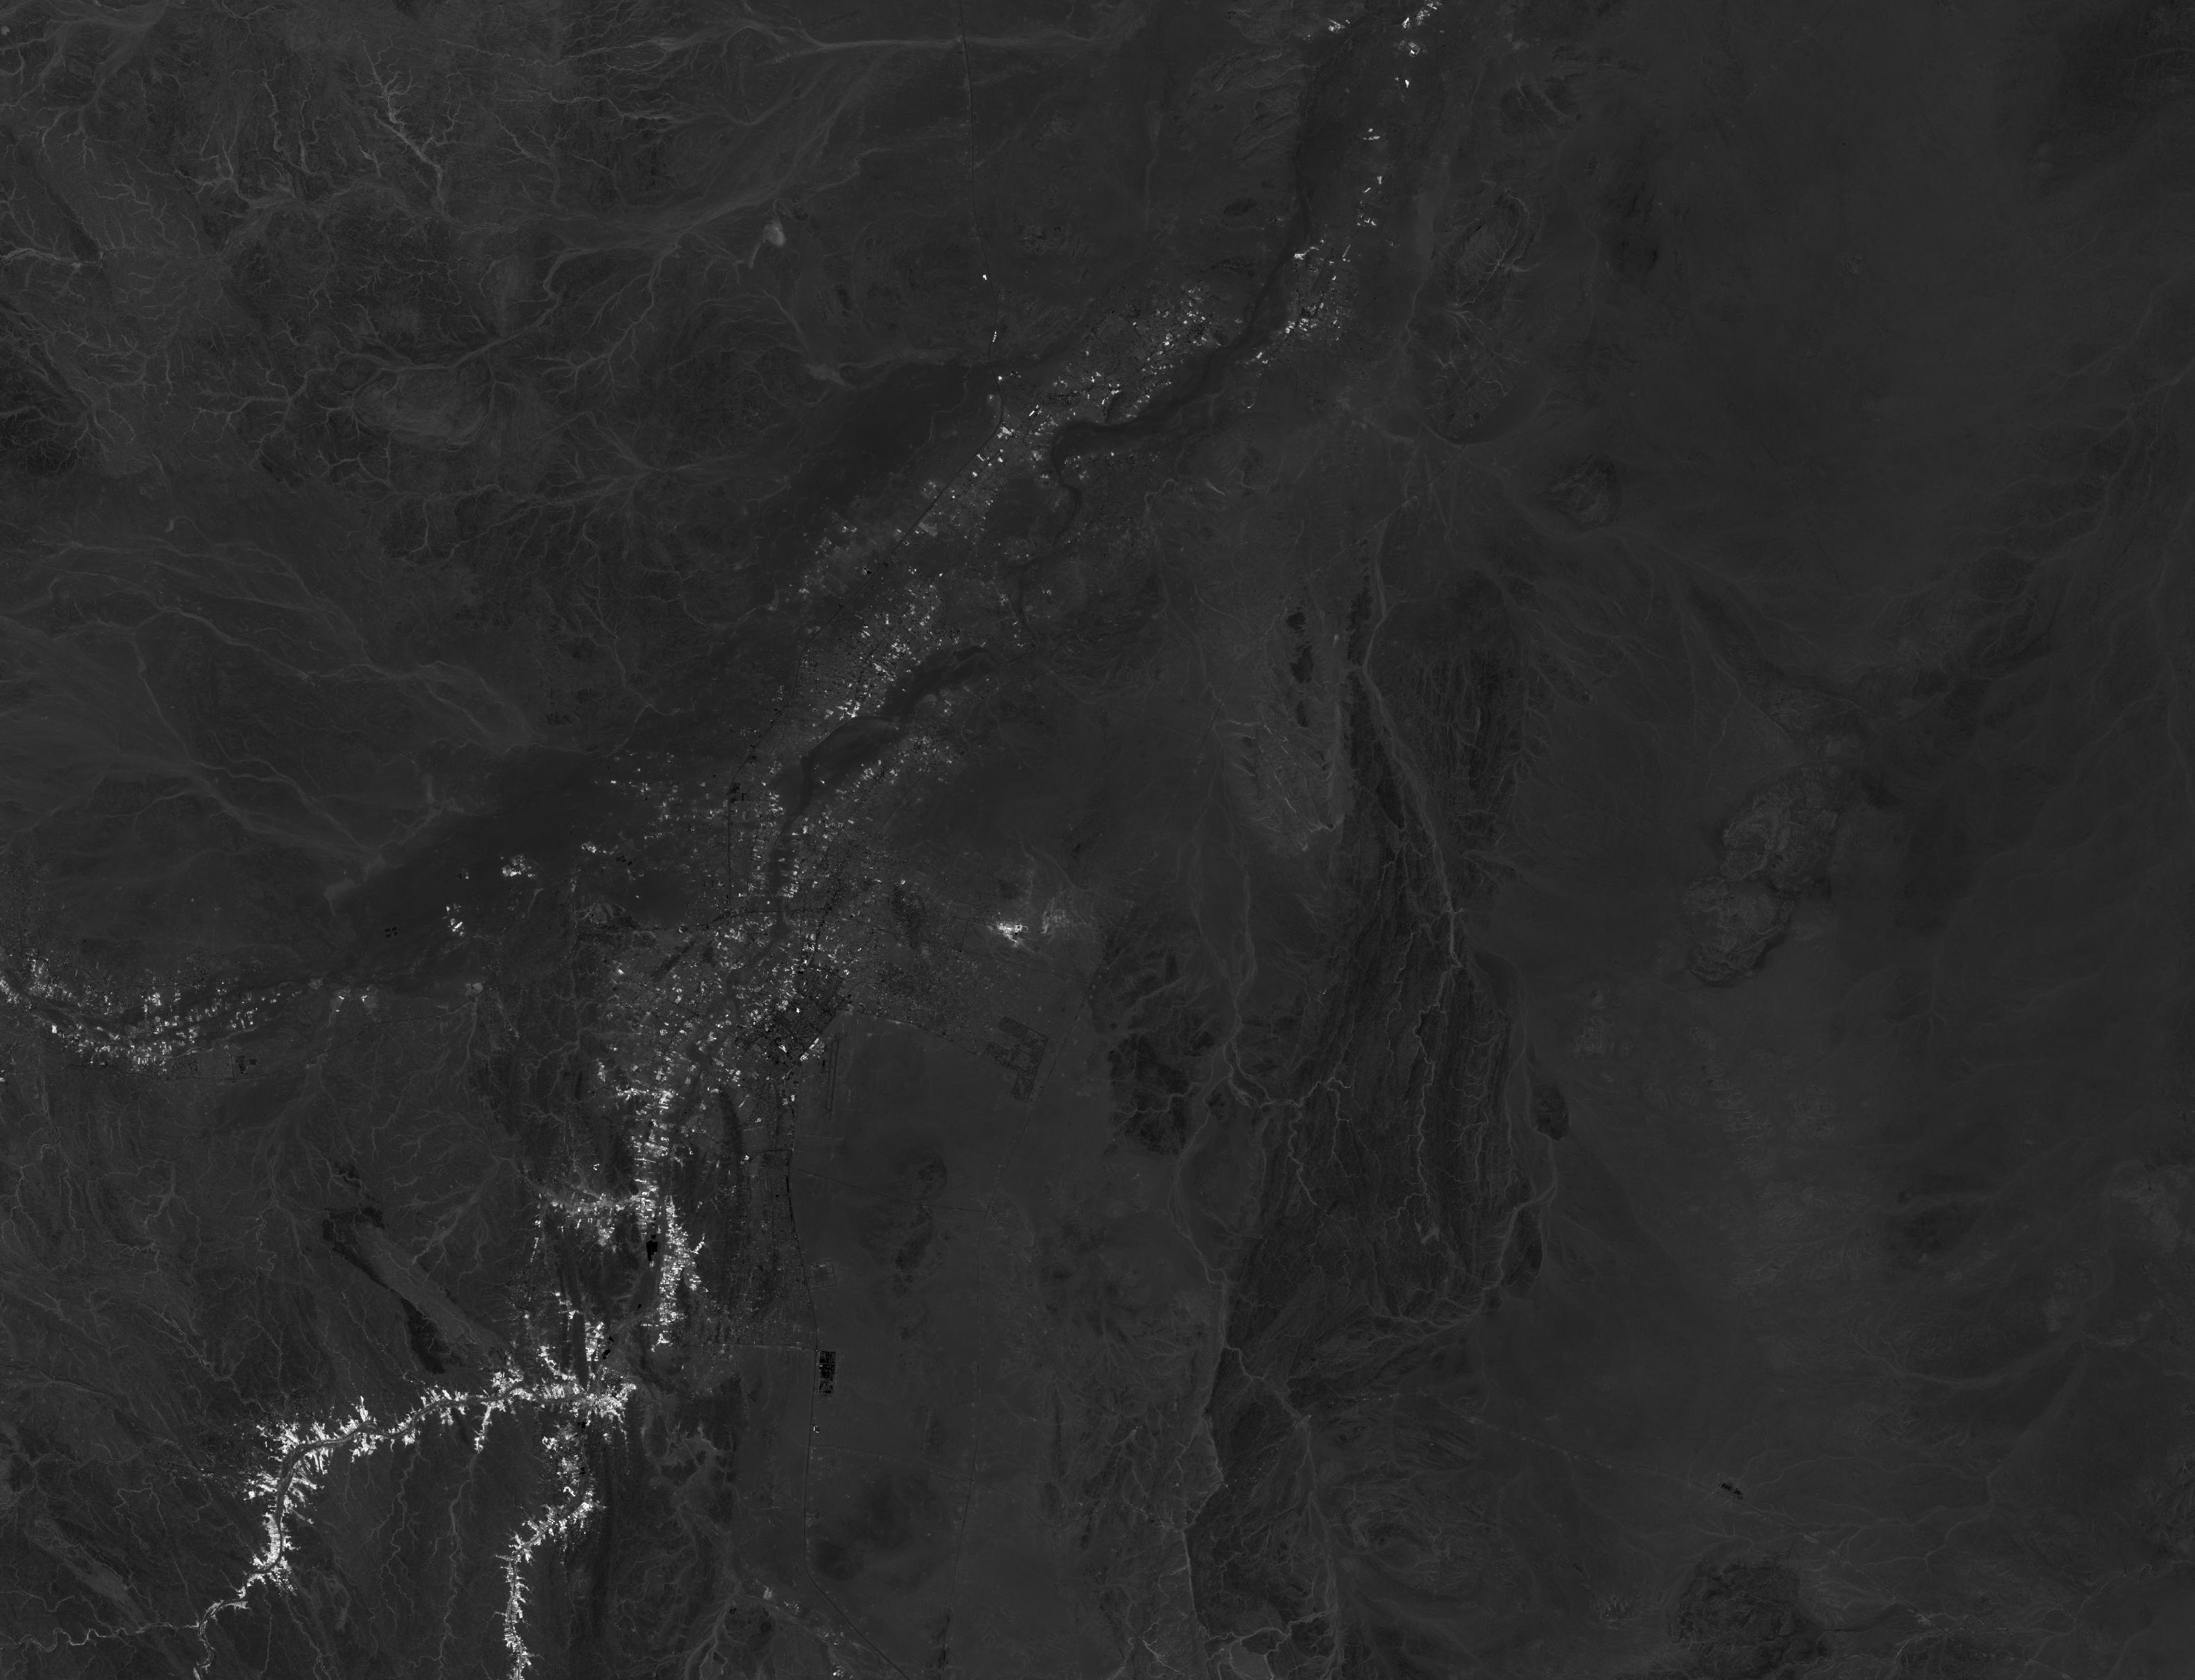

**the bright spots could indicate areas where human activity (potentially agriculture) is concentrated, or where water might be present or useful for digging wells.**

# KSA Data Analysis

**KSA Heatmap from space to identify promising agricultural areas**

In [ ]:
import geemap
import ee

# Initialize the Earth Engine API
ee.Initialize()

# Define the region for Saudi Arabia
ksa_bounds = ee.Geometry.Rectangle([34.5, 16.0, 55.5, 32.0])

# Load Sentinel-2 ImageCollection
sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate('2023-01-01', '2023-12-31') \
    .filterBounds(ksa_bounds) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Filter by low cloud cover

# Calculate NDVI for the region
ndvi = sentinel2.map(lambda image: image.normalizedDifference(['B8', 'B4']).rename('NDVI'))

# Get the mean NDVI value for the entire year
mean_ndvi = ndvi.mean().clip(ksa_bounds)

# Visualize the NDVI with a color palette
ndvi_palette = ['red', 'yellow', 'green']

# Define NDVI visualization parameters
ndvi_viz = {
    'min': 0.0,
    'max': 1.0,
    'palette': ndvi_palette,
}

# Create a map centered on KSA
Map = geemap.Map(center=[24.0, 45.0], zoom=5)
Map.addLayer(mean_ndvi, ndvi_viz, 'Mean NDVI Saudi Arabia')
Map


Map(center=[24.0, 45.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [ ]:
import geemap
import ee

# Initialize the Earth Engine API
ee.Initialize()

# Define the region for the southwestern part of Saudi Arabia
southwest_ksa_bounds = ee.Geometry.Rectangle([40.0, 16.0, 45.0, 22.0])

# Load Sentinel-2 ImageCollection
sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate('2023-01-01', '2023-12-31') \
    .filterBounds(southwest_ksa_bounds) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Filter by low cloud cover

# Calculate NDVI for the region
ndvi = sentinel2.map(lambda image: image.normalizedDifference(['B8', 'B4']).rename('NDVI'))

# Get the mean NDVI value for the entire year
mean_ndvi = ndvi.mean().clip(southwest_ksa_bounds)

# Visualize the NDVI with a color palette
ndvi_palette = ['red', 'yellow', 'green']

# Define NDVI visualization parameters
ndvi_viz = {
    'min': 0.0,
    'max': 1.0,
    'palette': ndvi_palette,
}

# Create a map centered on the southwestern region of KSA
Map = geemap.Map(center=[18.0, 42.5], zoom=6)
Map.addLayer(mean_ndvi, ndvi_viz, 'Mean NDVI Southwestern Region KSA')
Map


Map(center=[18.0, 42.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [ ]:
# تحميل البيانات بصيغة رقمية

In [ ]:
import ee
import geemap


ee.Initialize()

# تحديد حدود السعودية
ksa_bounds = ee.Geometry.Rectangle([34.5, 16.0, 55.5, 32.0])

# تحميل بيانات Sentinel-2 للفترة المطلوبة
sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
    .filterDate('2023-01-01', '2023-12-31') \
    .filterBounds(ksa_bounds) \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))

# حساب NDVI لكل الصور
ndvi = sentinel2.map(lambda image: image.normalizedDifference(['B8', 'B4']).rename('NDVI'))

# حساب متوسط NDVI في الفترة الزمنية لكل المنطقة
mean_ndvi = ndvi.mean().clip(ksa_bounds)

# دالة لإنشاء شبكة (grid) مكونة من n_cells
def create_grid(bounds, n_cells):
    """إنشاء شبكة تحتوي على n_cells ضمن الحدود المحددة."""
    coords = bounds.bounds().coordinates().get(0).getInfo()
    lon_min, lat_min = coords[0][0], coords[0][1]
    lon_max, lat_max = coords[2][0], coords[2][1]

    # حساب حجم الخطوة بناءً على عدد الخلايا المطلوبة
    num_rows = int(n_cells**0.5)  # لتقسيم الشبكة إلى مربع (حوالي 4000 خلية)
    lon_step = (lon_max - lon_min) / num_rows
    lat_step = (lat_max - lat_min) / num_rows

    # إنشاء الشبكة
    grid_cells = []
    for i in range(num_rows):
        for j in range(num_rows):
            cell = ee.Geometry.Rectangle(
                [lon_min + j * lon_step, lat_min + i * lat_step,
                 lon_min + (j + 1) * lon_step, lat_min + (i + 1) * lat_step]
            )
            grid_cells.append(cell)

    return ee.FeatureCollection([ee.Feature(cell) for cell in grid_cells])

# إنشاء الشبكة لتغطية السعودية مع 4000 خلية
grid = create_grid(ksa_bounds, 4000)

# دالة لتقليل قيم NDVI لكل خلية ضمن الشبكة وإعادة جدول البيانات
def extract_ndvi(feature):
    mean_ndvi_region = mean_ndvi.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=feature.geometry(),
        scale=1000,  # دقة التحليل (بالمتر)
        maxPixels=1e9
    )
    return feature.set(mean_ndvi_region)

# تطبيق الدالة على كل خلية في الشبكة
ndvi_table = grid.map(extract_ndvi)

# Export the NDVI values to CSV in Google Drive
task = ee.batch.Export.table.toDrive(
    collection=ndvi_table,
    description="KSA_NDVI_Grid_4000",
    fileFormat="CSV"
)
task.start()


In [ ]:
import pandas as pd

**بعد تحميل البيانات بصيغة رقمية ل4000 موقع في المملكة العربية السعودية , سنقوم بتحليلها لنرى مدى صلاحية الاراض للزراعة بناء على الغطاء النباتي**

In [ ]:
df2 = pd.read_csv('/content/KSA_NDVI_Grid_4000.csv')

NDVI:

This column shows the NDVI value for each grid cell. NDVI is an index that measures the density of green vegetation in an area. The values range from -1 to 1, where:
Values close to -1 represent water.
Values close to 0 indicate bare soil, rocks, or areas with little to no vegetation.
Values between 0.2 and 0.5 suggest sparse vegetation.
Values above 0.5 generally represent dense vegetation.
For example, an NDVI of 0.026909 indicates very sparse vegetation, whereas 0.079803 suggests slightly more vegetation in that grid cell.

In [ ]:
def classify_land(NDVI):
    if NDVI < 0.08:
        return 'Poor'
    elif 0.08 <= NDVI < 0.15:
        return 'Moderate Potential'
    elif NDVI >= 0.15:
        return 'Suitable for Farming'
    else:
        return 'Unknown'

# Apply the classification to each row in the DataFrame
df2['Land Suitability'] = df2['NDVI'].apply(classify_land)

# Display the updated DataFrame
print(df2[['system:index', 'NDVI', 'Land Suitability']])



      system:index      NDVI Land Suitability
0                0  0.030925             Poor
1                1  0.027135             Poor
2                2  0.032769             Poor
3                3  0.039326             Poor
4                4  0.070621             Poor
...            ...       ...              ...
3964          3964       NaN          Unknown
3965          3965       NaN          Unknown
3966          3966       NaN          Unknown
3967          3967       NaN          Unknown
3968          3968       NaN          Unknown

[3969 rows x 3 columns]


In [ ]:
counts = df2['Land Suitability'].value_counts()
print(counts)

Land Suitability
Poor                    3733
Moderate Potential       218
Unknown                   12
Suitable for Farming       6
Name: count, dtype: int64
